### MongoDB에 접속

In [1]:
from pymongo import MongoClient # mongodb에 접속 패키지

In [2]:
# Mongodb에 저장하는 객체, db명 = python_test
db = MongoClient().python_test

### MongoDBd에 파일을 저장할 GridFS  객체 생성

In [3]:
from gridfs import GridFS

In [4]:
fs = GridFS(db)

### url에서 이미지 다운로드 받기

In [6]:
import urllib.request

In [5]:
url = 'https://t1.daumcdn.net/cfile/tistory/9958A4405C440B5F12'

In [8]:
image = urllib.request.urlopen(url).read()

In [9]:
# ! pip install image # 숫자로 인코딩 되어있는 이미지를 보기 위해
# ! pip install pillow
from io import BytesIO
from PIL import Image

  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19486 sha256=df1c63ed68977589a37e8a8f69b208a514624b1b1e1db3dd3796ca97f5cb7db1
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\ac\30\5c\a8b33888bea3507eda7c924a143d34b2390d2ca5b145b327b5
Successfully built image


#### url 에서 다운받은 이미지 불러오기

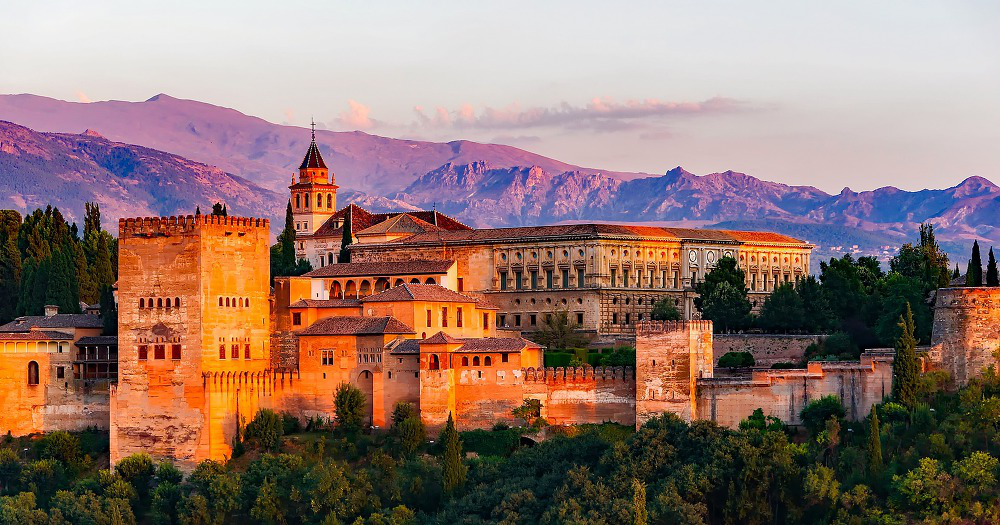

In [15]:
Image.open(BytesIO(image))

### 저장하기

In [16]:
from gridfs import GridFSBucket

In [17]:
# 이미지 파일을 저장할 객체 생성
bucket = GridFSBucket(db)

In [21]:
# 이미지 파일 저장
grid_in =bucket.open_upload_stream(
    "9958A4405C440B5F1.jpg",
    metadata = {"contentType":"image/jpg"})

In [22]:
grid_in.write(image)

In [25]:
grid_in.close() # 업로드 끝

### 저장한 이미지 조회

In [26]:
# db = mongo db에 접속하는 객체
# fs =  파일을 저장할 GridFS 객체
db.fs.files.find()

In [27]:
list(db.fs.files.find())

[{'_id': ObjectId('608f5c0b04107577b18afb72'),
  'filename': 'test.txt',
  'md5': 'f724155ac0c9f27e693daa18c3427d07',
  'chunkSize': 261120,
  'length': 34,
  'uploadDate': datetime.datetime(2021, 5, 3, 2, 12, 27, 551000)},
 {'_id': ObjectId('608f5c3c04107577b18afb74'),
  'filename': 'test.txt',
  'md5': 'f724155ac0c9f27e693daa18c3427d07',
  'chunkSize': 261120,
  'length': 34,
  'uploadDate': datetime.datetime(2021, 5, 3, 2, 13, 16, 265000)},
 {'_id': ObjectId('608f7fb55b7bb5f8f0ea131f'),
  'filename': '9958A4405C440B5F1.jpg',
  'metadata': {'contentType': 'image/jpg'},
  'chunkSize': 261120,
  'md5': '9409f5dbf43929898cf5a8bfcc25d832',
  'length': 226061,
  'uploadDate': datetime.datetime(2021, 5, 3, 4, 46, 10, 805000)}]

In [31]:
# 이미지 파일의 정보 보기
image_file = db.fs.files.find()[2]

In [32]:
image_file

{'_id': ObjectId('608f7fb55b7bb5f8f0ea131f'),
 'filename': '9958A4405C440B5F1.jpg',
 'metadata': {'contentType': 'image/jpg'},
 'chunkSize': 261120,
 'md5': '9409f5dbf43929898cf5a8bfcc25d832',
 'length': 226061,
 'uploadDate': datetime.datetime(2021, 5, 3, 4, 46, 10, 805000)}

In [34]:
# 딕셔너리로 저장되어있으니깐 파일명만 조회
db.fs.files.find()[2]["filename"]

'9958A4405C440B5F1.jpg'

In [36]:
# 파일명이 일치하는 마지막 파일의 내용을 가져올 객체 f 리턴
f = fs.get_last_version(filename=db.fs.files.find()[2]["filename"])

In [37]:
# 파일의 내용을 읽어서 data에 저장
data = f.read()
data

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x01,\x01,\x00\x00\xff\xe1\x00\xe0Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x06\x01\x0f\x00\x02\x00\x00\x00\x05\x00\x00\x00V\x01\x10\x00\x02\x00\x00\x00\n\x00\x00\x00\\\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00f\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00n\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00v\x00\x00\x00\x00SONY\x00\x00DSLR-A550\x00\x00\x00\x01,\x00\x00\x00\x01\x00\x00\x01,\x00\x00\x00\x01\x00\x06\x90\x00\x00\x07\x00\x00\x00\x040210\x90\x03\x00\x02\x00\x00\x00\x14\x00\x00\x00\xc4\xa0\x00\x00\x07\x00\x00\x00\x040100\xa0\x01\x00\x03\x00\x00\x00\x01\xff\xff\x00\x00\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x03\xe8\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x02\r\x00\x00\x00\x002014:08:06 20:55:20\x00\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x

### 이미지 불러오기- mongo DB에서 가져온 파일을 가져와서 이미지로

In [38]:
from IPython.display import display

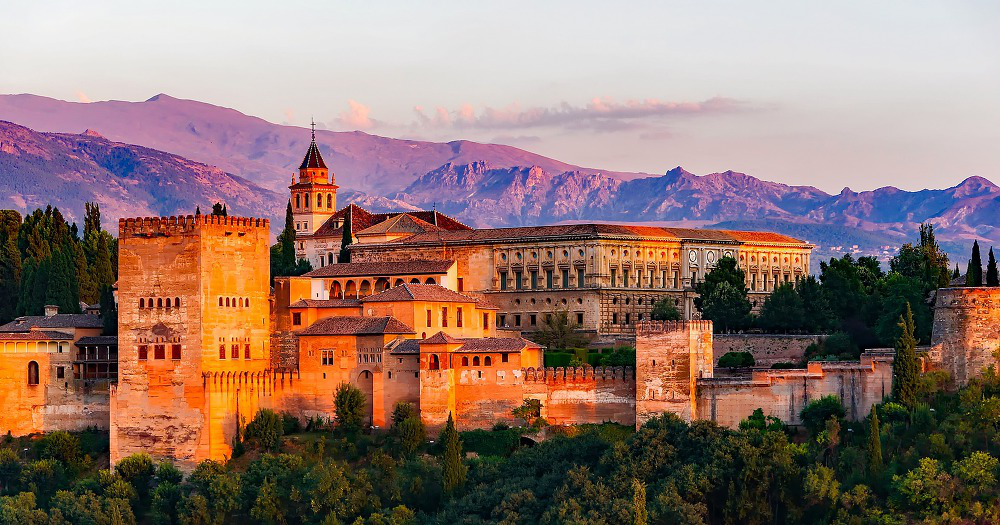

In [40]:
display(image)